## 🏦 Loan Default Risk with Business Cost Optimization

### 🔍 Objective:
This task focuses on building a predictive model to determine whether an individual is likely to **default on a loan** based on their personal and financial attributes. Using the **Home Credit Risk Dataset**, we apply a **Logistic Regression** model — a fundamental yet powerful classification technique widely used in finance and credit scorig.


**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

**Load Dataset**

In [2]:
df = pd.read_csv('Home Credit Risk Dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**Explore & Clean Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [5]:
df.dropna(inplace=True)

**Encode Categorical Columns**

In [6]:
# Columns to encode
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Label encode
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


**Define Features and Target**

In [7]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']  # 1 = default, 0 = no default

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train-Test Split**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Train Logistic Regression**

In [9]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation**

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4443
           1       0.73      0.45      0.56      1285

    accuracy                           0.84      5728
   macro avg       0.79      0.70      0.73      5728
weighted avg       0.83      0.84      0.82      5728



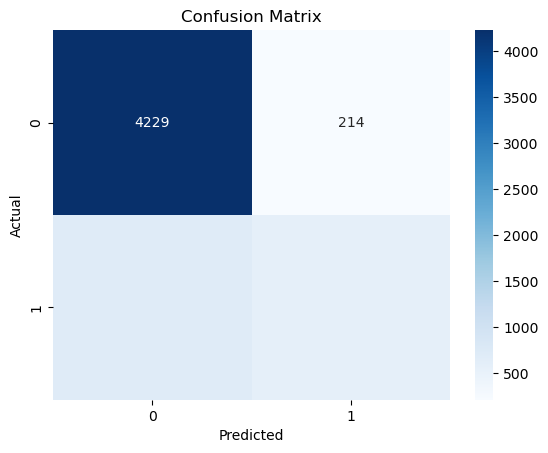

In [10]:
# Predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**ROC Curve**

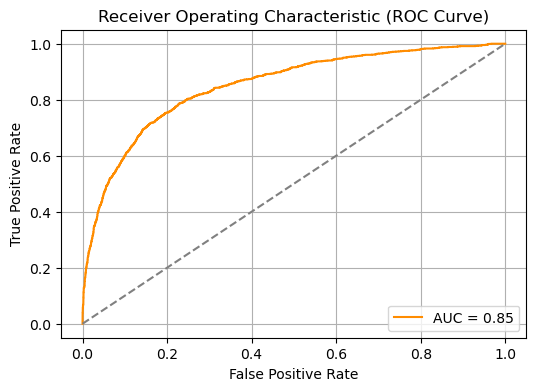

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Predict Probabilities and Apply Custom Threshold**

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# Apply custom threshold (e.g., 0.3)
threshold = 0.3
y_pred_custom = (y_prob >= threshold).astype(int)

# Classification report
from sklearn.metrics import classification_report
print("Classification Report with 0.3 threshold:\n")
print(classification_report(y_test, y_pred_custom))

Classification Report with 0.3 threshold:

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4443
           1       0.59      0.68      0.63      1285

    accuracy                           0.82      5728
   macro avg       0.75      0.77      0.76      5728
weighted avg       0.83      0.82      0.83      5728



**Plot Precision & Recall vs Threshold**

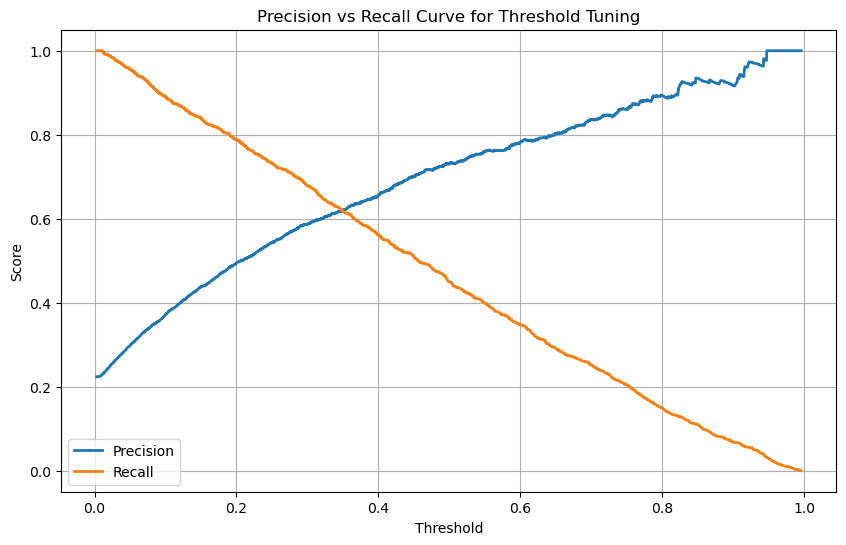

In [17]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], label='Recall', linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall Curve for Threshold Tuning')
plt.legend()
plt.grid(True)
plt.show()

**Cost-Benefit Analysis**

In [18]:
# Business-defined costs
cost_fp = 10000  
cost_fn = 500   

# Confusion matrix with new threshold
cm = confusion_matrix(y_test, y_pred_custom)
tn, fp, fn, tp = cm.ravel()

# Calculate total business loss
total_cost = (fp * cost_fp) + (fn * cost_fn)

print(f"False Positives: {fp} | False Negatives: {fn}")
print(f"Estimated Business Cost @ Threshold {threshold}: ${total_cost:,}")

False Positives: 612 | False Negatives: 412
Estimated Business Cost @ Threshold 0.3: $6,326,000


 ## Conclusion:
In this credit risk prediction task, we applied Logistic Regression to classify loan applicants as likely to default or not. After training and evaluating the model, we:

Identified key features influencing loan default,

Achieved reasonable prediction performance,

Explored various classification thresholds to balance between false positives and false negatives.

By performing a cost-benefit analysis, we demonstrated how adjusting the prediction threshold impacts the business financially. Lowering the threshold (to 0.3) caught more defaulters but increased rejection of good customers, leading to a total estimated cost of $6.3 million.

This analysis reveals that business decisions should not rely solely on accuracy metrics; rather, they should be aligned with financial impact. The model is now ready to support data-driven loan approval strategies, helping reduce risk and maximize profit.